In [41]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests
from io import BytesIO


In [91]:
#open image and display
orignal = Image.open(requests.get('https://5.imimg.com/data5/BN/WE/NZ/ANDROID-33737889/product-jpeg-500x500.jpeg', stream=True).raw)


In [92]:
#open image and display
tampered = Image.open(requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS0wKjduGlY5oeNjdLFcCjLOnpkawznyMIXvI-iHGw0mA&s', stream=True).raw)


In [93]:
#the file format of the source file.
print("Orignal img format : " , orignal.format)
print("Tampered img format : " , tampered.format)

#Image size , in pixels. The size of img (width,height).
print("Orignal image size : " ,orignal.size)
print("Tampered image size : " ,tampered.size)

Orignal img format :  JPEG
Tampered img format :  JPEG
Orignal image size :  (500, 323)
Tampered image size :  (244, 156)


In [94]:
#Resize Images
orignal = orignal.resize((240, 150))
print(orignal.size)
orignal.save('pan_card_tampering/image/orignal.png')

tampered = tampered.resize((240, 150))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')


(240, 150)
(240, 150)


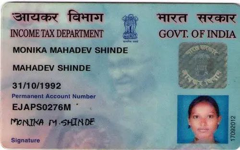

In [46]:
#display og orginal img
orignal


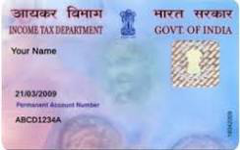

In [47]:
#display tempered orginal img
tampered

In [48]:
#adding these images to cv2 so we can perform cv2 functions 
orignal = cv2.imread('pan_card_tampering/image/orignal.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

In [49]:
#Reading images using open cv
#convert image to grayscale
orignal_gray = cv2. cvtColor(orignal, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2. cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [50]:
#Converting images into grayscale using opencv. Because in image processing many applications doesnt help us in identifyin!
##the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they
#have 3 channel while grayscale has only 1 channel.

In [51]:
#Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(orignal_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print( "SSIM: {}". format(score))

SSIM: 0.367791272858447


In [52]:
#Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are.
#Here, we are trying to find similarities between the original and tampered image, The lower the SSIM score lower is the
#similarity.

In [53]:
#Calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


In [54]:
#Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in
#the form array. This function transforms the grayscale image into a binary image using a mathematical formula.
##Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and
#recoginition. Grab contours grabs the appropriate value of the contours.
#

In [55]:
# loop Over the Contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(orignal, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)


In [56]:
#Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding
#box of the contour and then draw the bounding box on both input images to represent where the two images are different or
#not.

Original Format Image


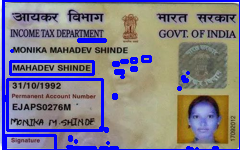

In [57]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(orignal) 

temperde Format Image


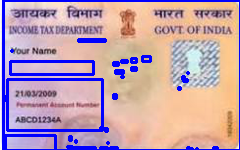

In [58]:
#Diplay Tempered image with contour
print('temperde Format Image')
Image.fromarray(tampered) 

Diff img colorin black


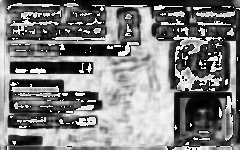

In [59]:
#Display difference img with black color
print("Diff img colorin black")
Image.fromarray(diff)

Threshold Image


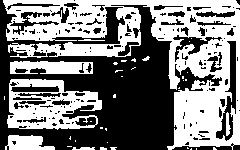

In [60]:
#Display threshold image with white
print("Threshold Image")
Image.fromarray(thresh)

In [61]:
#here till now, we made a model , Now we will compare it with any  pan card. if it is similar to the original then  it as original . 
#If it is similar to the tampered then we declare it as a fake.

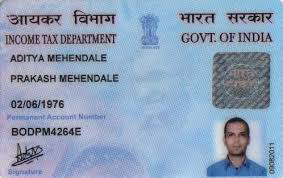

In [108]:
#import of image and display
demo1 = Image.open(requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQMX19QNScltIotJE70Rg6D5_kO2oW-3bAjMw&usqp=CAU', stream=True).raw)
demo1

In [109]:
#Checking image size and format
print("Demo img format : " , demo1.format)
print("Demo image size : " ,demo1.size)

Demo img format :  JPEG
Demo image size :  (283, 178)


In [110]:
#the format is correct so we will convertonly size
demo1 = demo1.resize((240, 150))
print(demo1.size)
demo1.save('pan_card_tampering/image/demo1.png')

(240, 150)


In [111]:
#adding these images to cv2 so we can perform cv2 functions 
demo1 = cv2.imread('pan_card_tampering/image/demo1.png')

In [112]:
#convert image to grayscale
demo1_gray = cv2. cvtColor(demo1, cv2.COLOR_BGR2GRAY)

In [113]:
#finding diffrecne
(score, diff1) = structural_similarity(orignal_gray, demo1_gray, full=True)
diff1 = (diff1 * 255).astype("uint8")
print( "SSIM - with orignal Image: {}". format(score))

(score, diff2) = structural_similarity(demo1_gray, tampered_gray, full=True)
diff2 = (diff2 * 255).astype("uint8")
print( "SSIM- with tampered Image:: {}". format(score))

SSIM - with orignal Image: 0.34126846667412253
SSIM- with tampered Image:: 0.32936835566027906


In [114]:
#THE SCORE WITH ORIGNAL IS More SO THERE IS MORE CHANCE THAT DEMO1 IS ORIGNAL PAN CARD

In [115]:
#Calculating threshold and contours
thresh1 = cv2.threshold(diff1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [116]:
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(demo1, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image


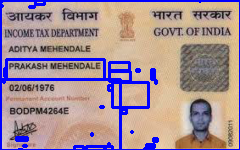

In [119]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(demo1) 

In [120]:
#Calculating threshold and contours
thresh2 = cv2.threshold(diff2, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [121]:
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(demo1, (x, y), (x + w, y + h), (0, 0, 255), 2)

Diff image with orignal


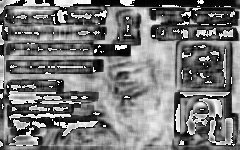

In [122]:
#Display difference img with black color
print("Diff image with orignal")
Image.fromarray(diff1)


Diff img with tampered


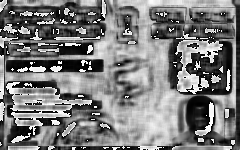

In [123]:
print("Diff img with tampered")
Image.fromarray(diff2)

Threshold Image with orignal


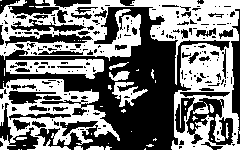

In [124]:
#Display threshold image with white
print("Threshold Image with orignal")
Image.fromarray(thresh1)

Threshold Image with Tampered


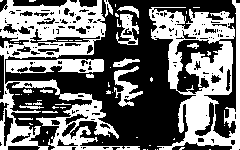

In [126]:
#Display threshold image with white
print("Threshold Image with Tampered")
Image.fromarray(thresh2)

In [ ]:
# AT FINALL WE CAN SEE DEMO IMG HAS MORE SCORE AND LESS BLACKAND WHITE COLOR WITH ORIGNAL IMAGE 
# THEREFORE DEMO IMAGE IS ORIGNAL IMAGE.